In [4]:
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

import cuml
from cuml.ensemble import RandomForestClassifier as cuRF

from scipy.stats import randint
import os
import pickle


ModuleNotFoundError: No module named 'cuml'

In [95]:
#Import training data
path = r'C:\Users\attic\HLS_Kelp\imagery\rf_training'
files = os.listdir(path)
training_data = []
for file in files:
    with rasterio.open(os.path.join(path, file)) as src:
        training_img = src.read()  
    file_data = training_img.reshape(training_img.shape[0], -1) 
    training_data.append(file_data)

combined_training_data = np.hstack(training_data)

print(combined_training_data.shape)
# plt.figure(figsize=(6, 6))
# plt.imshow(training_img[6,:], cmap='gray')
# plt.show()  



(7, 40186800)


In [97]:
X = file_data[0:6,:].T #figured this out by complete chance, organizes it as the transpose. Good to know !!
y = file_data[6,:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
with open(r'C:\Users\attic\HLS_Kelp\random_forest\rf.pickle', 'wb') as f:
    pickle.dump(rf, f)

In [102]:

with rasterio.open(r'C:\Users\attic\HLS_Kelp\imagery\rf_prepped\HLS.L30.T11SKU.2018122T183316.v2.0_rf_ready.tif') as test:
    test_img = test.read()
test_data = test_img.reshape(test_img.shape[0], -1).T
print(test_data.shape)
test_data = test_data[:,0:6]

(13395600, 6)


In [101]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9957948878736301


In [103]:
kelp_pred = rf.predict(test_data)


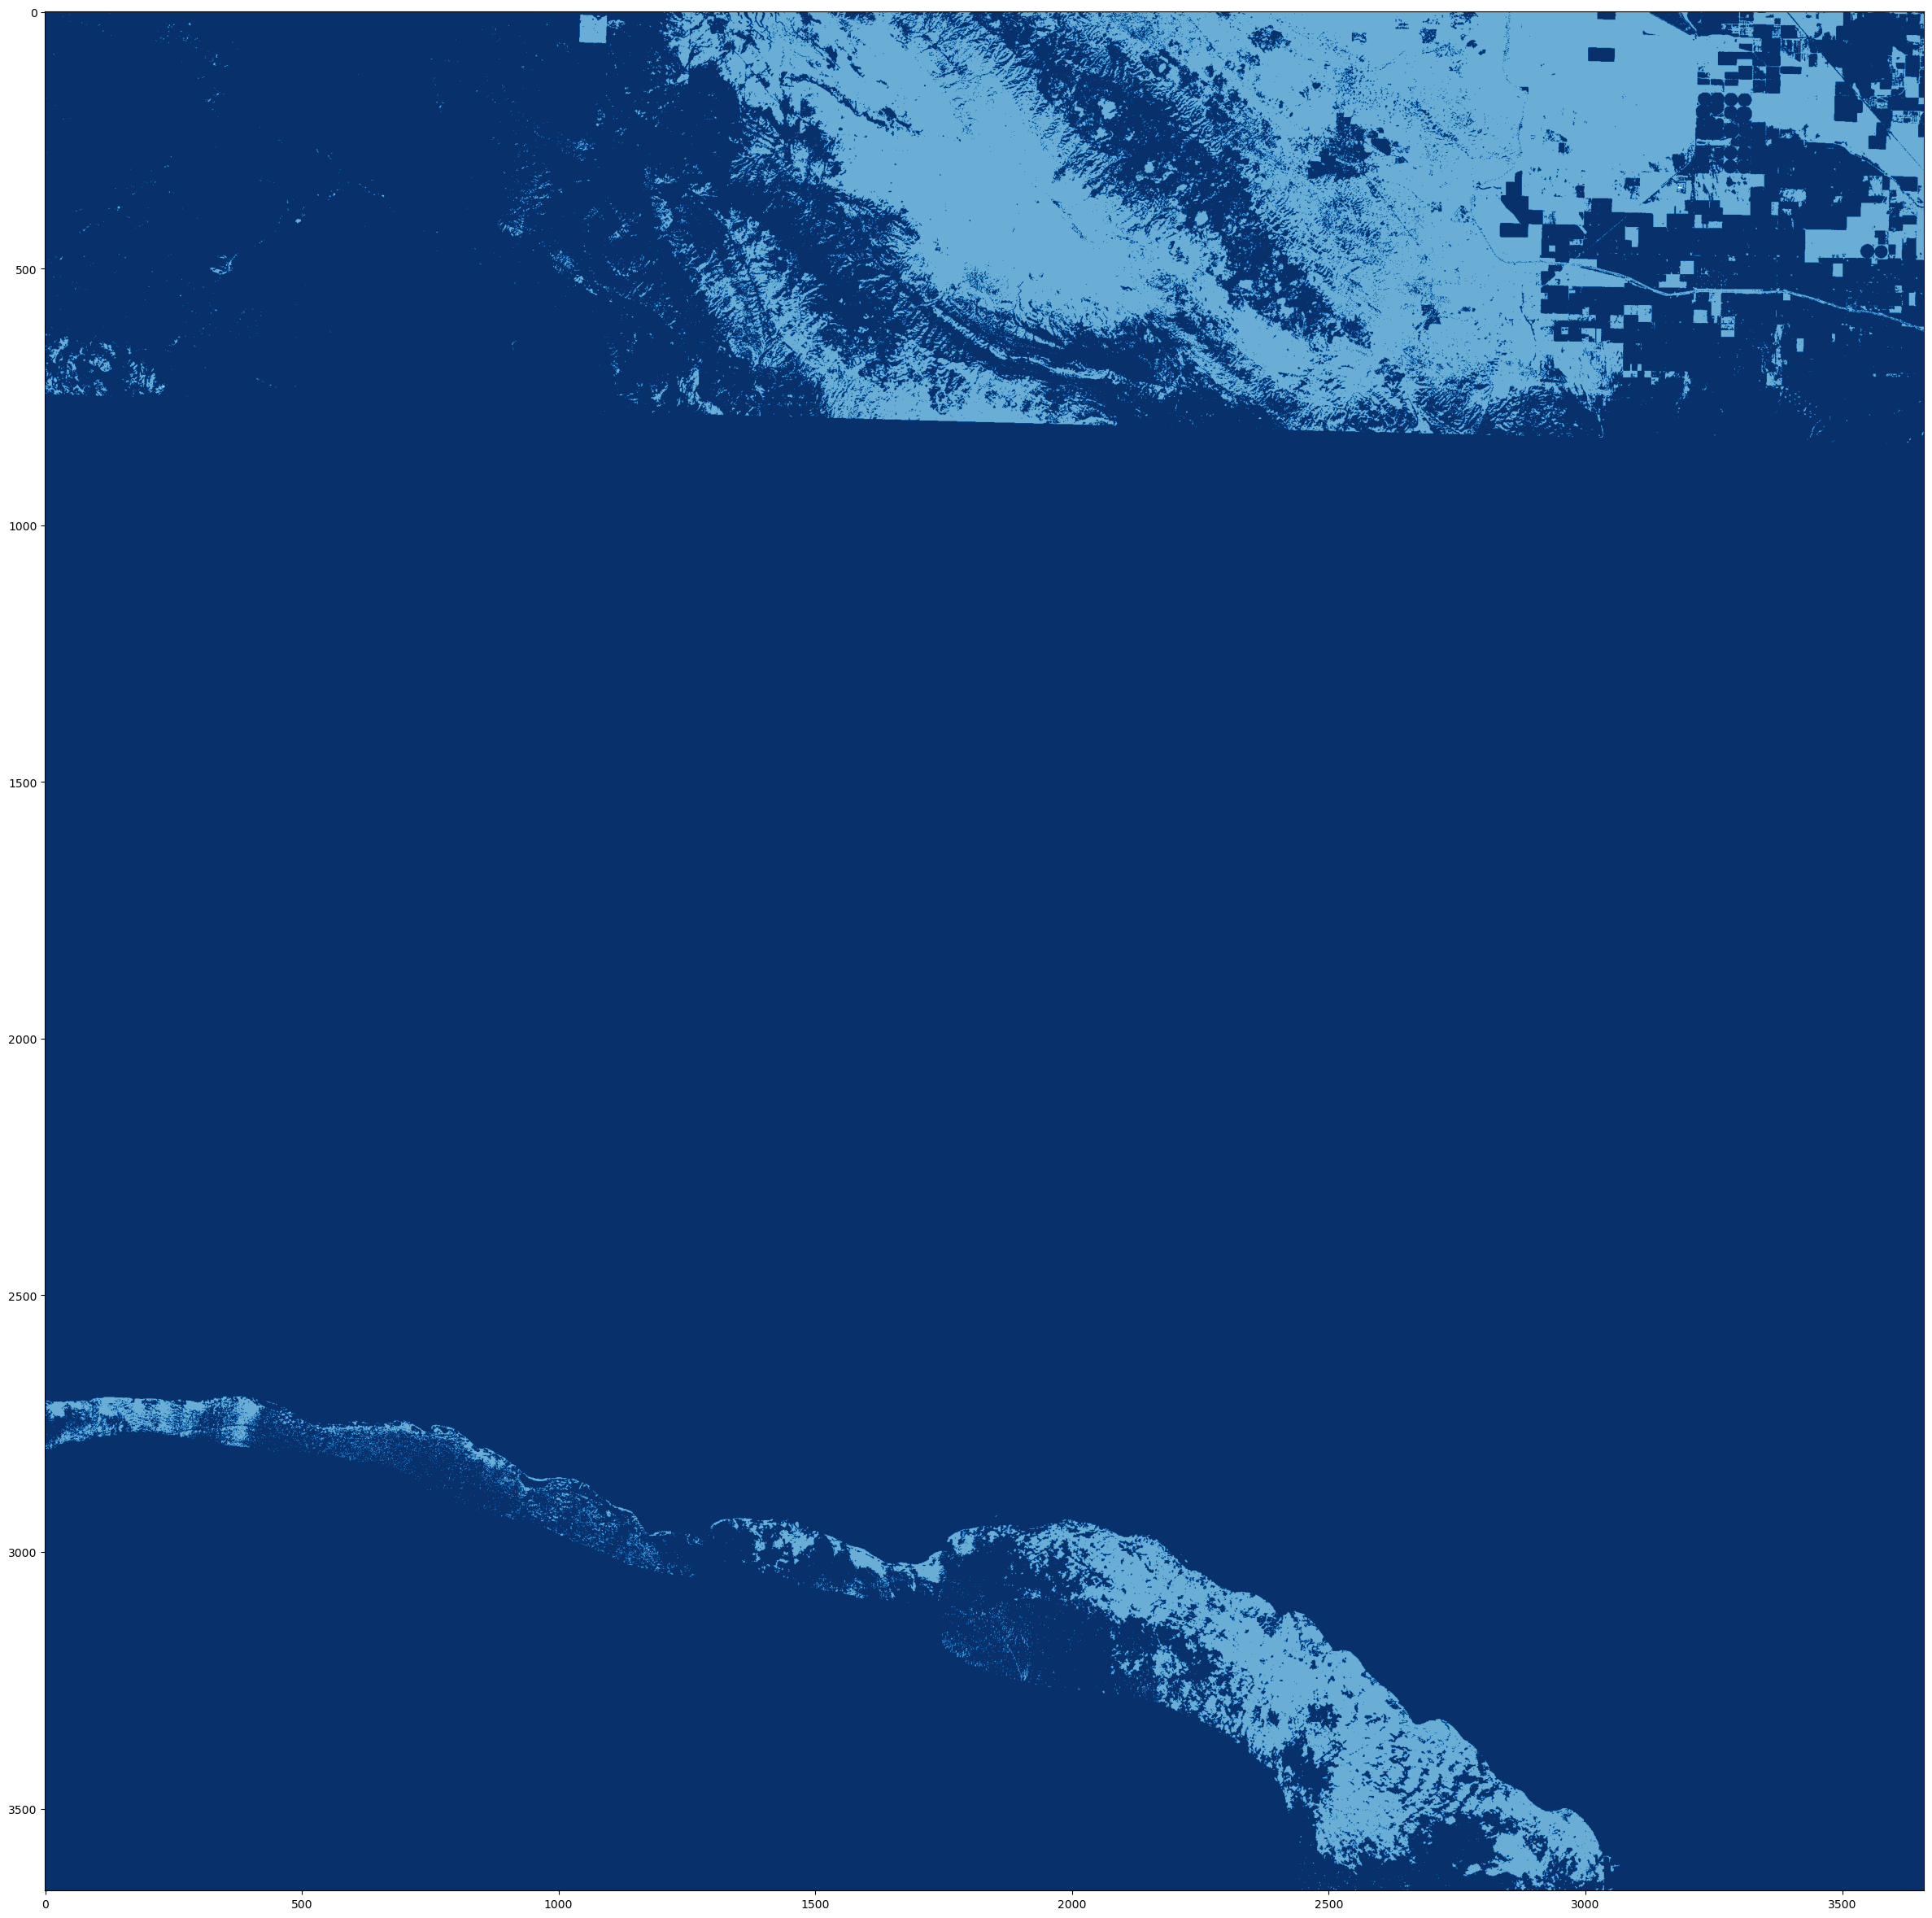

In [104]:
kelp_map = kelp_pred.reshape(3660,3660)

plt.figure(figsize=(30, 30))
plt.imshow(kelp_map, cmap='Blues')

plt.show()  